In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import cv2
from PIL import Image
import scipy
from scipy import ndimage
from collections import deque
%matplotlib inline

In [ ]:
data = np.array(pd.read_csv('A_Z Handwritten Data.csv', header=None))


In [3]:
data=shuffle(data)
train = data[0:372000,:]
test = data[372000:372451,:]
print(train.shape)
print(test.shape)


(372000, 785)
(451, 785)


In [4]:
print(train)

[[15  0  0 ...  0  0  0]
 [18  0  0 ...  0  0  0]
 [14  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [20  0  0 ...  0  0  0]
 [18  0  0 ...  0  0  0]]


In [5]:
x_train = train[0:, 1:]
y_train = train[0:, 0]
x_test = test[:, 1:]
y_test = test[:, 0]

In [6]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (372000, 784)
y_train shape:  (372000,)
x_test shape:  (451, 784)
y_test shape:  (451,)


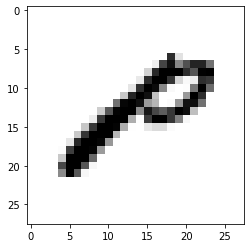

15
[15 18 14 18  0 15 18 14 20 18]
y_train shape:  (372000, 26)
y_test shape:  (451, 26)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [7]:
plt.imshow(x_train[0].reshape(28,28), cmap = 'binary')
plt.show()

print(y_train[0])

print(y_train[:10])


from tensorflow.python.keras.utils.np_utils import to_categorical
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


print('y_train shape: ', y_train_encoded.shape)
print('y_test shape: ', y_test_encoded.shape)


print(y_train_encoded[0])


In [8]:
x_train_reshaped = np.reshape(x_train, (y_train_encoded.shape[0], 28,28,1))
x_test_reshaped = np.reshape(x_test, (y_test_encoded.shape[0], 28,28,1))

# x_train_reshaped=np.flip(np.rot90(x_train_reshaped,k=1,axes=(1,2)),1)
# x_test_reshaped=np.flip(np.rot90(x_test_reshaped,k=1,axes=(1,2)),1)

print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (372000, 28, 28, 1)
x_test_reshaped shape:  (451, 28, 28, 1)


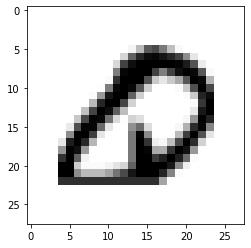

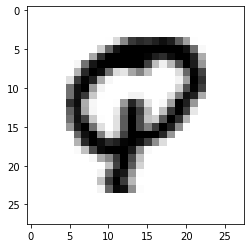

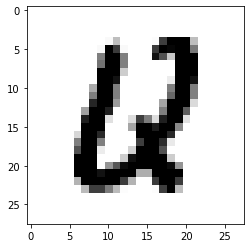

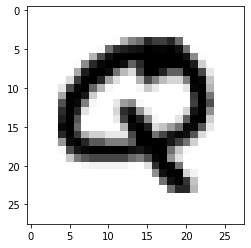

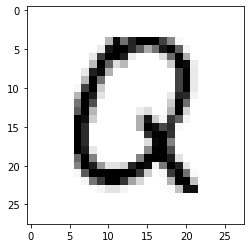

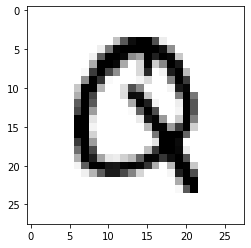

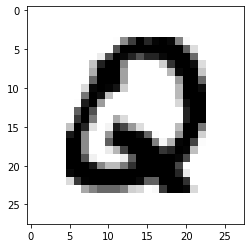

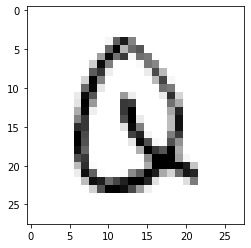

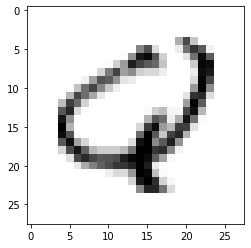

In [9]:
for i in range(500):
    if y_train[i]==16:
        plt.imshow(x_train_reshaped[i,:,:,0], cmap = 'binary')
        plt.show()

In [10]:
x_mean = np.mean(x_train_reshaped)
x_std = np.std(x_train_reshaped)

print('mean: ', x_mean)
print('std: ', x_std)

mean:  39.1283106210226
std:  83.1807310411005


In [11]:
epsilon = 1e-10
x_train_norm = (x_train_reshaped - x_mean)/(x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean)/(x_std + epsilon)

# print(set(x_train_norm[0]))


In [12]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.AveragePooling2D(4,5),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.Flatten()])


model.add(Dense(26))
model.add(Activation('softmax'))
    
model.compile(
optimizer = 'adam',
loss = 'categorical_crossentropy',
metrics = ['accuracy']
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 26)                15002     
_________________________________________________________________
activation (Activation)      (None, 26)                0

In [14]:
h = model.fit(
    x_train_norm,
    y_train_encoded,
    epochs = 5,
    batch_size=512,
)
model.save('model')

Train on 372000 samples
Epoch 1/5
372000/372000 [==============================] - 11s 30us/sample - loss: 0.3451 - accuracy: 0.9049
Epoch 2/5
372000/372000 [==============================] - 7s 18us/sample - loss: 0.0947 - accuracy: 0.9739
Epoch 3/5
372000/372000 [==============================] - 7s 18us/sample - loss: 0.0718 - accuracy: 0.9800
Epoch 4/5
372000/372000 [==============================] - 6s 17us/sample - loss: 0.0596 - accuracy: 0.9832
Epoch 5/5
372000/372000 [==============================] - 7s 18us/sample - loss: 0.0515 - accuracy: 0.9855


In [15]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)

print('test set accuracy: ', accuracy * 100)


451/451 [==============================] - 0s 362us/sample - loss: 0.0593 - accuracy: 0.9867
test set accuracy:  98.66962432861328


In [16]:
preds = model.predict(x_test_norm)

print('shape of preds: ', preds.shape)


shape of preds:  (451, 26)


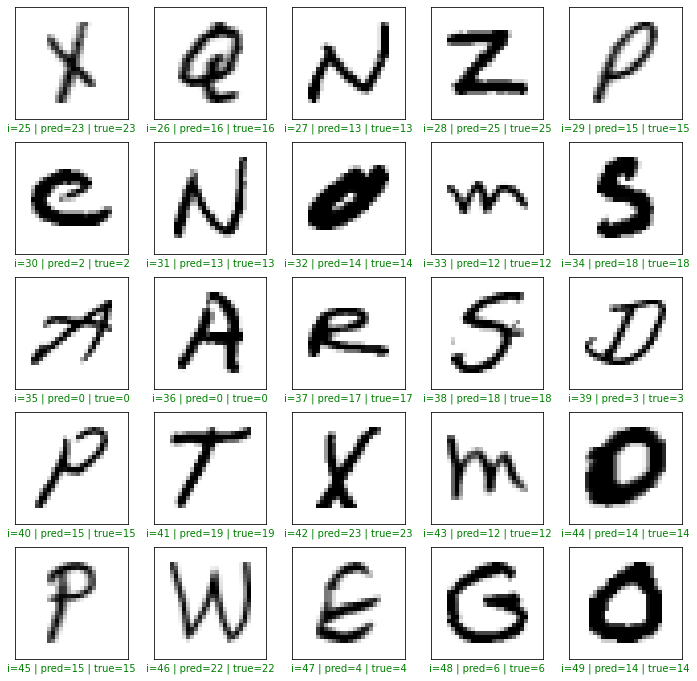

In [17]:
plt.figure(figsize = (12, 12))

start_index = 25

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test_reshaped[start_index + i,:,:,0], cmap='binary')
plt.show()



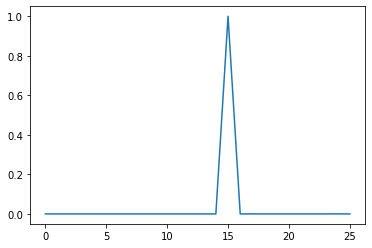

In [18]:
index = 40

plt.plot(preds[index])
plt.show()

In [21]:
inpt=[]
for i in range(10):
    vid_capture = cv2.VideoCapture(0)
    vid_cod = cv2.VideoWriter_fourcc(*'XVID')
    inpt.append(cv2.VideoWriter("media/input/input"+str(i)+".avi", vid_cod, 20.0, (640,480)))

    while(True):
        ret,frame = vid_capture.read()
        frame=np.flip(frame,1)
        inpt[i].write(frame)
        cv2.imshow("My cam video", frame)
        if cv2.waitKey(1) &0XFF == ord('x'):
            break
    cv2.destroyAllWindows()

    vid_capture.release()
    inpt[i].release()
    cv2.destroyAllWindows()

In [2]:
for i in range(10):
    vid_cod = cv2.VideoWriter_fourcc(*'XVID')
    output = cv2.VideoWriter("media/output/capBinary"+str(i)+".avi", vid_cod, 20.0, (640,480))
    output1 = cv2.VideoWriter("media/output/tracked"+str(i)+".avi", vid_cod, 20.0, (640,480))

    vid = cv2.VideoCapture("media/input/input"+str(i)+".avi")

    pts=deque()
    kernel = np.ones((5,5),np.uint8)

    lower_green = np.array([80,80,100])
    upper_green = np.array([90, 255,255])

    remove=0
    while(True):
        ret, frame = vid.read()
        if ret == False:
            break
        if cv2.waitKey(25) & 0xFF == ord('x'):
            break
        remove=remove+1
        if remove>10:
            blurred = cv2.GaussianBlur(frame, (41, 41), 0)
            blurred = cv2.medianBlur(blurred,31)
            hsv = cv2.cvtColor(blurred, cv2.COLOR_BGR2HSV)
            mask = cv2.inRange(hsv, lower_green, upper_green)
            mask = cv2.erode(mask, kernel, iterations=2)
            mask = cv2.dilate(mask, kernel, iterations=2)
#             cv2.imshow('mask',mask)
            image=cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
            output.write(image)
            contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
            if contours:
                c = max(contours, key=cv2.contourArea)
                cont = cv2.drawContours(frame.copy(), c, -1, (0,0,0), 3)
                ((x, y), radius) = cv2.minEnclosingCircle(c)
                M = cv2.moments(c)
                center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))
                pts.appendleft(center)
            else:
                cont=cv2.drawContours(frame.copy(), [np.array([[0,0], [0,0], [0,0]])], -1, (0,0,0), 3)
            for k in range(1, len(pts)):
                if pts[k - 1] is None or pts[k] is None:
                    continue
                thickness = 40
                cv2.line(cont, pts[k - 1], pts[k], (0, 0, 255), thickness)
            
            out=np.concatenate((cont,image),axis=1)
            cv2.imshow('Frame',out)
            output1.write(cont)

    cv2.imwrite("media/output/letter"+str(i)+".jpg",cont)
    vid.release()
    output.release()
    cv2.destroyAllWindows()

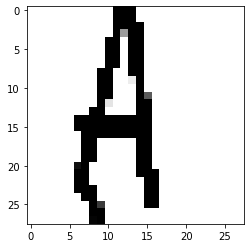

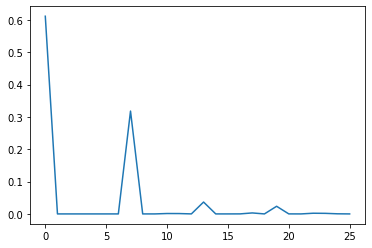

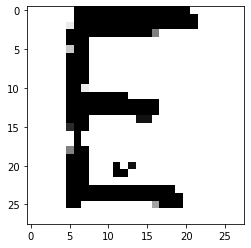

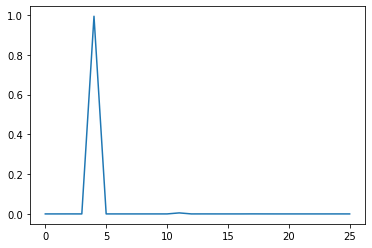

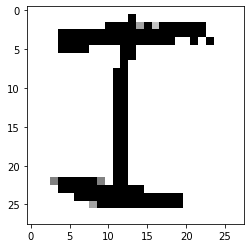

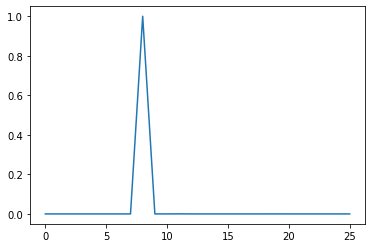

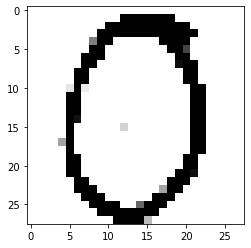

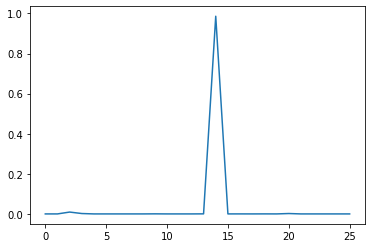

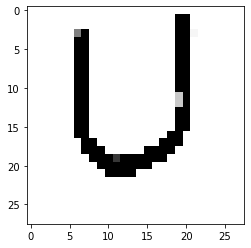

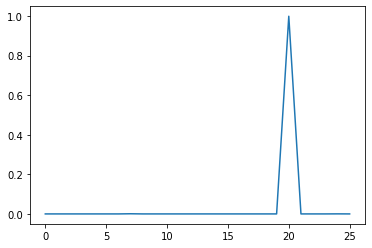

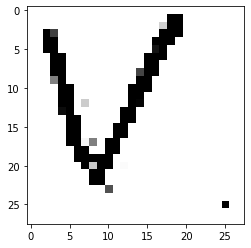

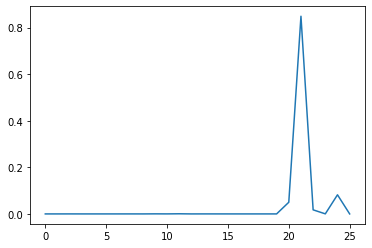

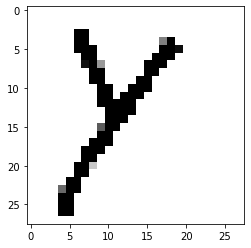

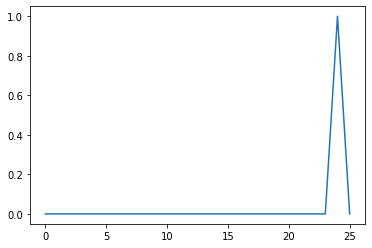

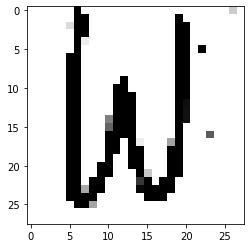

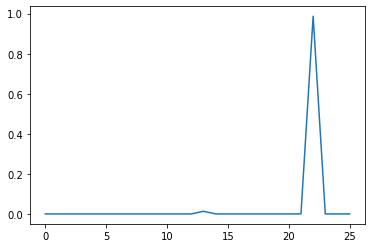

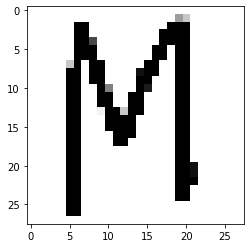

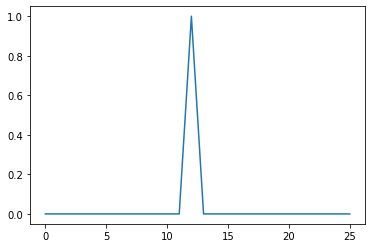

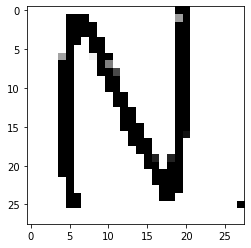

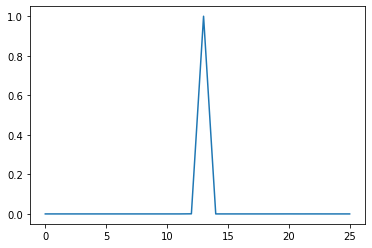

In [3]:
model=tf.keras.models.load_model('model')
for i in range(10):
    image = cv2.imread("media/output/letter"+str(i)+".jpg")
    bwImage = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    maskedImage = cv2.inRange(bwImage,(0, 100,100) ,(50, 255,255) )
    ret, binImage = cv2.threshold(maskedImage,98,255,cv2. THRESH_BINARY)
    resizedImage = cv2.resize(binImage, (28, 28)) 
    # cv2.imshow('image',image)
    # cv2.waitKey(5000)
    # cv2.destroyAllWindows()
    x_mean=39.12690786838929
    x_std=83.17919075489337
    epsilon=1e-10
    reshapedImage = np.reshape(np.array(resizedImage), (1, 28,28,1))
    normalisedImage=(reshapedImage - x_mean)/(x_std + epsilon)
    plt.imshow(normalisedImage.reshape(28,28), cmap = 'binary')
    plt.show()

    # letters=np.array(['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','d','e','f','g','h','n','q','r','t'])
    pr=model.predict(normalisedImage)
    predAlpha=np.argmax(pr)
    plt.plot(pr[0])
    plt.show()
    row=predAlpha//5
    col=predAlpha%5
    alphabet = cv2.imread('alphabets.jpg')
    show=cv2.resize(alphabet[row*217:(row+1)*217,col*217:(col+1)*217,:],(480, 480))
    result=np.concatenate((image,show),axis=1)
    cv2.imshow('result',result)
    cv2.imwrite("media/output/result"+str(i)+".jpg",result)
    # for i in range(0,6):
    #     for j in range(0,5):
    #         cv2.imshow('Frame'+str(i)+str(j),alphabet[i*217:(i+1)*217,j*217:(j+1)*217,:])
    cv2.waitKey(0)
    cv2.destroyAllWindows()


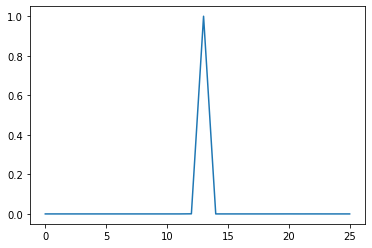

[9.4859190e-12 1.5209997e-16 1.0639588e-14 1.8293689e-11 2.4707102e-24
 2.0005165e-21 5.4621875e-14 5.1610533e-07 3.1058484e-19 7.7793722e-14
 3.9518330e-11 1.1177613e-11 5.1843800e-04 9.9932837e-01 8.2269613e-13
 1.7095558e-11 6.1799199e-12 4.3615441e-14 9.5258998e-19 1.7032271e-13
 9.4736657e-05 1.5132586e-07 5.7851688e-05 1.2346611e-10 2.1461735e-08
 4.6724323e-21]


In [6]:
plt.plot(pr[0])
plt.show()
print(pr[0])